This notebook is meant to explore the relationship between our transportation data and the CO2 emissions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.api.types import is_numeric_dtype
from scipy import stats


In [2]:
transportation_df = pd.read_csv("./data/raw_data/Monthly_Transportation_Statistics.csv")

Extract the month and year from the datetime column and make new columns to hold those values 

In [3]:
transportation_df['Month'] = [int(datetime.split('/')[0]) for datetime in transportation_df['Date']]
transportation_df['Year'] = [int(datetime.split('/')[2][0:4]) for datetime in transportation_df['Date']]

In [4]:
transportation_df.tail()

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance,Transborder - U.S. - Canada Freight,Month,Year
880,880,5/1/2020 0:00,22.0,NaN,NaN,"8,430,000","190,000","8,240,000","5,630,575","128,612,616",...,"9,488,000","190,000","2,709,000","8,240,000","56,068,942,704","25,367,164,296",0.890796,"30,701,778,408",5,2020
881,881,6/1/2020 0:00,29.0,NaN,NaN,"16,490,000.00","400,000","16,090,000","7,069,441","159,137,385",...,"10,102,000","400,000","2,967,000","16,090,000","82,051,488,528.00","41,591,152,333",NaN,"40,460,336,195",6,2020
882,882,7/1/2020 0:00,55.0,NaN,NaN,NaN,NaN,NaN,"6,906,061","176,412,126",...,"11,023,000",NaN,"3,498,000",NaN,"90,959,108,077","47,536,726,155",NaN,"43,422,381,922",7,2020
883,883,8/1/2020 0:00,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2020
884,884,9/1/2020 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2020


In [5]:
#make a df with only the air transportation data 
air_transport_df = transportation_df[["Month", "Year", "U.S. Airline Traffic - Total - Non Seasonally Adjusted", "U.S. Airline Traffic - International - Non Seasonally Adjusted",  "U.S. Airline Traffic - Domestic - Non Seasonally Adjusted"]]

In [6]:
#Consider any NA values - for now, I am just going to fill the ones that are NAN with 0 in the columns I am looking at

air_transport_df = air_transport_df.rename(columns = {'U.S. Airline Traffic - International - Non Seasonally Adjusted' : 'airline_international',
                                                      'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted' : 'airline_domestic',
                                                        'U.S. Airline Traffic - Total - Non Seasonally Adjusted' : 'airline_total'})

air_transport_df['airline_domestic'] = air_transport_df['airline_domestic'].fillna(0)
air_transport_df['airline_international'] = air_transport_df['airline_international'].fillna(0)
air_transport_df['airline_total'] = air_transport_df['airline_total'].fillna(0)



#Let's just look at data since 2017
air_transport_recent = air_transport_df[air_transport_df["Year"].astype(int) >= 2017]

Let's set the index to be the month and year combined

In [7]:
air_transport_recent.loc[:, "Month-Year"] = air_transport_recent.loc[:, "Month"].astype(str) + '-' + air_transport_recent.loc[:, "Year"].astype(str) 
#air_transport_recent.set_index("Month-Year", inplace = True)

C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
#take out any commas in the data
air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(str)
air_transport_recent.loc[:, 'airline_international'] = [float(s.replace(',','')) for s in air_transport_recent.loc[:, 'airline_international']]
#air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(float)

air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(str)
air_transport_recent.loc[:, 'airline_domestic'] = [float(s.replace(',','')) for s in air_transport_recent.loc[:, 'airline_domestic']]
#air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(float)

air_transport_recent.loc[:, 'airline_total'] = air_transport_recent.loc[:,'airline_total'].astype(str)
air_transport_recent.loc[:, 'airline_total'] = [float(s.replace(',','')) for s in air_transport_recent.loc[:, 'airline_total']]
#air_transport_recent.loc[:, 'airline_total'] = air_transport_recent.loc[:,'airline_total'].astype(float)



In [9]:
air_transport_recent.head()

,Month,Year,airline_total,airline_international,airline_domestic,Month-Year
840,1,2017,62620000.0,8510000.0,54110000.0,1-2017
841,2,2017,58380000.0,7300000.0,51080000.0,2-2017
842,3,2017,72960000.0,9000000.0,63960000.0,3-2017
843,4,2017,70260000.0,9160000.0,61100000.0,4-2017
844,5,2017,73680000.0,9240000.0,64440000.0,5-2017


Let's look at the total non seasonally adjusted data by month 


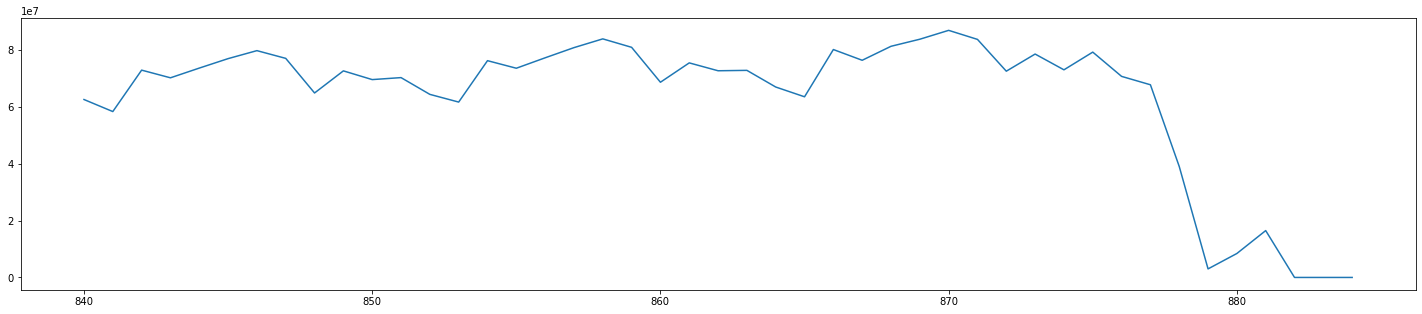

In [10]:
plt.figure(figsize=(25, 5))
plt.plot(air_transport_recent["airline_total"])

plt.show()

Next I add the CO2 data to see if it is correlated 

READ IN THE NATIONWIDE CO2 DATA

In [11]:
country_CO2_df = pd.read_csv(r'.\\data\NOAACO2.csv')
#The last row is all NUll
country_CO2_df.drop(index = 750, inplace = True)
#The days column all have a slash at the end - we will take that off of there
country_CO2_df["days"] = [country_CO2_df.loc[row, "days"][0:2] for row in range(len(country_CO2_df))]
country_CO2_df["month"] = country_CO2_df["month"].astype(int)
country_CO2_df["average"] = country_CO2_df["average"].astype(float)
country_CO2_df.head()

,year,month,decimaldate,average,interpolated,trend,days
0,1958,3,"1,958,208",315.71,315.71,314.62,-1
1,1958,4,"1,958,292",317.45,317.45,315.29,-1
2,1958,5,"1,958,375",317.50,317.50,314.71,-1
3,1958,6,"1,958,458",-99.99,317.10,314.85,-1
4,1958,7,"1,958,542",315.86,315.86,314.98,-1


In [87]:
#add a column that combines the month and year and set that as the index 
country_CO2_df["Month-Year"] = [str(country_CO2_df.loc[row, "month"]) + '-' + country_CO2_df.loc[row, "year"] for row in range(len(country_CO2_df))]

recent_CO2_us = country_CO2_df[country_CO2_df["year"].astype(int) >= 2017]


In [88]:
#we will just look at the pre-covid data for the next graph
CO2_us_precovid = recent_CO2_us[recent_CO2_us['year'].astype(int) < 2020]
air_transport_precovid = air_transport_recent[air_transport_recent['Year'] < 2020]

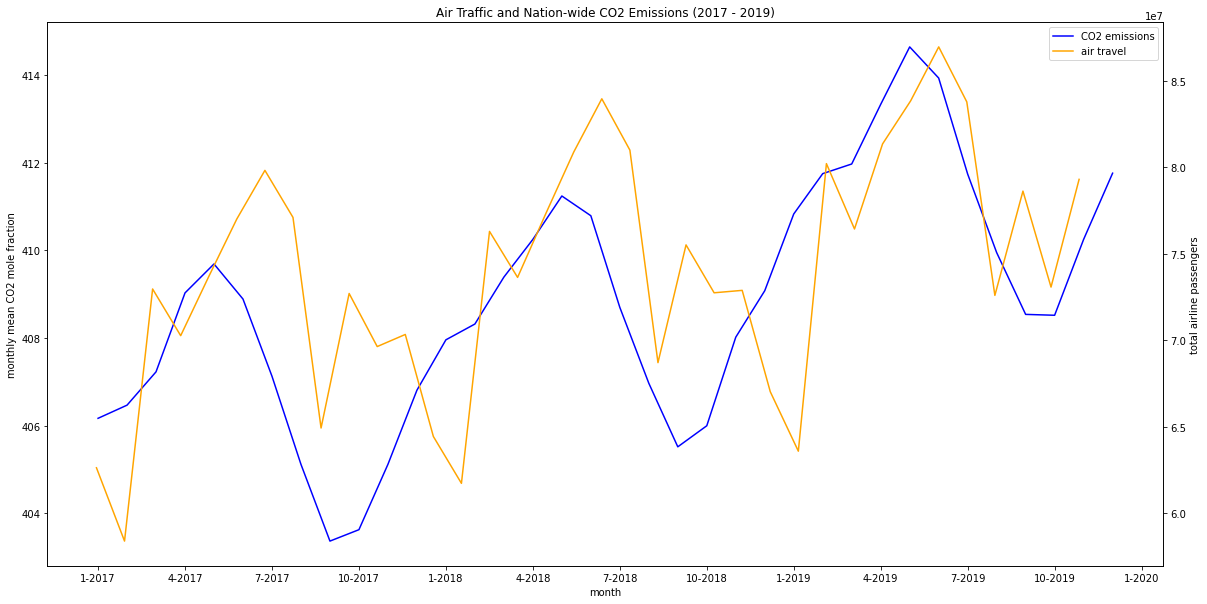

In [90]:
#Plot the CO2 and transportation data together
figure, axis_1 = plt.subplots(figsize=(20,10))
axis_1.plot(CO2_us_precovid["Month-Year"], CO2_us_precovid["average"], color = "blue", label = 'CO2 emissions')
axis_2 = axis_1.twinx()
axis_2.plot(air_transport_precovid["Month-Year"], air_transport_precovid["airline_total"], color = "orange", label = 'air travel')

#get every third month so our x axis isnt cluttered
every_third = np.arange(0, len(recent_CO2_us), 3)
months = list(recent_CO2_us['Month-Year'])
every_third_month = [months[x] for x in every_third]

axis_1.set_title('Air Traffic and Nation-wide CO2 Emissions (2017 - 2019)')
axis_1.set_xlabel('month')
axis_1.set_ylabel('monthly mean CO2 mole fraction')
axis_2.set_ylabel('total airline passengers')

#Set the x ticks to every third value
plt.xticks(every_third_month)

#Plot the legened
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

axis_1.legend(lines, labels, loc=0)

plt.show()

That doesn't make much sense! I wonder if we would see some more correlation with car traffic... let's look

In [14]:
highway_miles_df = transportation_df.loc[:, ["Month", "Year", "Highway Vehicle Miles Traveled - All Systems"]]
highway_miles_df = highway_miles_df.rename(columns = {"Highway Vehicle Miles Traveled - All Systems" : "highway_miles"})
#fill na values
highway_miles_df = highway_miles_df.fillna(0)
#make a column with the month and year just like we did above
highway_miles_df.loc[:, "Month-Year"] = highway_miles_df.loc[:, "Month"].astype(str) + '-' + highway_miles_df.loc[:, "Year"].astype(str) 


In [15]:
#many of the rows have null values in the miles column.... we only want the ones with values
highway_recorded = highway_miles_df[highway_miles_df['highway_miles'] != 0]
#highway_recorded.set_index('Month-Year', inplace = True)
#Take out the commas from the mileage values
highway_recorded.loc[:, 'highway_miles'] = [float(s.replace(',','')) for s in highway_recorded.loc[:, 'highway_miles']]


C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


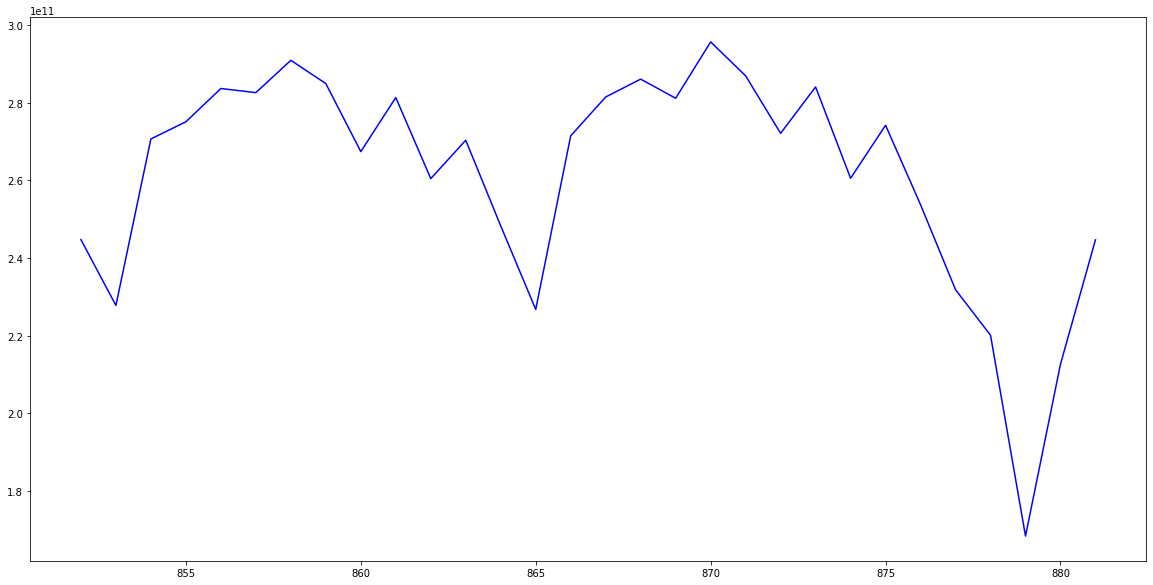

In [16]:
#plot the highway data
figure, highway = plt.subplots(figsize=(20,10))
highway.plot(highway_recorded["highway_miles"], color = "blue", label = 'Highway Miles - All Systems')


In [17]:
#our highway data only goes back to 2018, so we will use CO2 data that starts there as well
CO2_2018 = recent_CO2_us[recent_CO2_us['year'].astype(int) >= 2018]

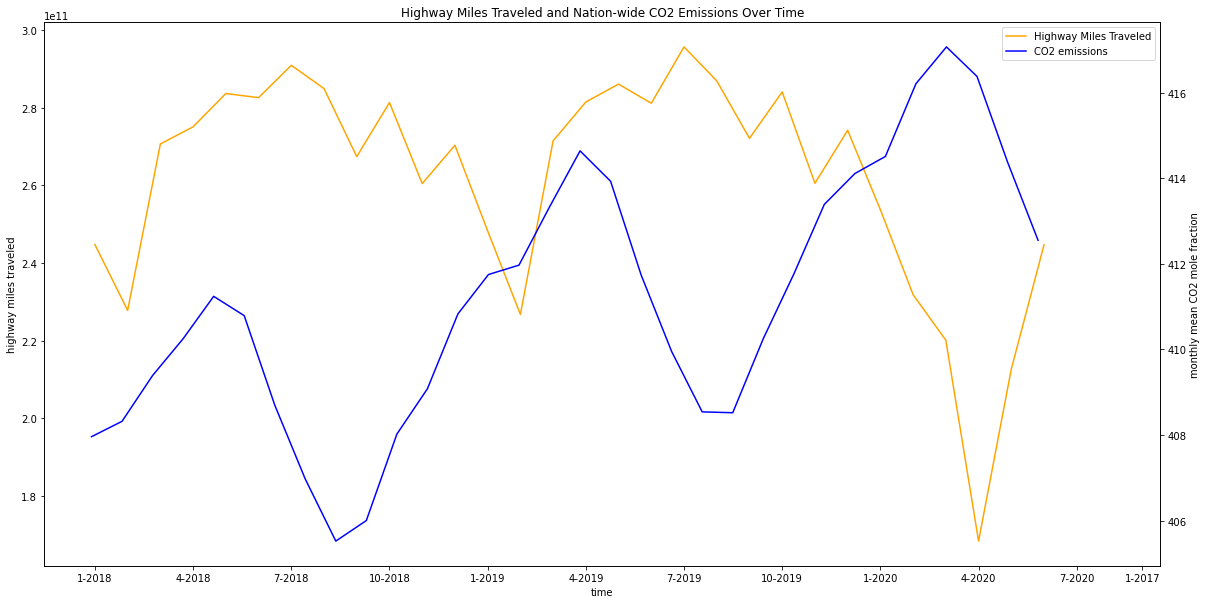

In [18]:
#Plot the CO2 and highway data together
figure2, highway_graph = plt.subplots(figsize=(20,10))
highway_graph.plot(highway_recorded['Month-Year'], highway_recorded['highway_miles'], color = "orange", label = 'Highway Miles Traveled')
CO2_graph = highway_graph.twinx()
CO2_graph.plot(CO2_2018['Month-Year'], CO2_2018["average"], color = "blue", label = 'CO2 emissions')

#get every third month so our x axis isnt cluttered
every_third_2018 = np.arange(0, len(CO2_2018), 3)
months_2018_on = list(CO2_2018['Month-Year'])
every_third_month_2018 = [months_2018_on[x] for x in every_third_2018]

highway_graph.set_title('Highway Miles Traveled and Nation-wide CO2 Emissions Over Time')
highway_graph.set_xlabel('time')
CO2_graph.set_ylabel('monthly mean CO2 mole fraction')
highway_graph.set_ylabel('highway miles traveled')

#Set the x ticks to every third value
plt.xticks(every_third_month)

#Plot the legened
highway_lines, highway_labels = highway_graph.get_legend_handles_labels()
CO2_lines, CO2_labels = CO2_graph.get_legend_handles_labels()

highway_CO2_lines = highway_lines + CO2_lines
highway_CO2_labels = highway_labels + CO2_labels

highway_graph.legend(highway_CO2_lines, highway_CO2_labels, loc=0)

plt.show()

Let's confirm that the State-level data follows the same trends as the data observed in Hawaii from the NASA observatory
(https://climate.nasa.gov/vital-signs/carbon-dioxide/)

I will aggregate the state-level CO2 data to observe that

In [19]:
state_CO2 = pd.read_excel("./data/raw_data/total_CO2_emissions.xlsx")

In [20]:
new_header = state_CO2.iloc[3] #grab the first row for the header
state_CO2 = state_CO2[4:] #take the data less the header row
state_CO2.columns = new_header #set the header row as the df header
state_CO2.set_index('State', inplace = True)

Let's flip the dataframe so that we can see the total emissions over the years in a column

In [21]:
state_CO2_flip = state_CO2.transpose()
state_CO2_flip.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Wisconsin,Wyoming,Total of states (unadjusted)¹,Adjustment to match United States,United States,NaN,"Sources: U.S. Energy Information Administration (EIA), State Energy Data System and EIA calculations made for this table. United States national-level total, EIA Monthly Energy Review, July 2019 Section 11.","Note: The District of Columbia is included in the data tables, but not in the analysis as it is not a state.",¹State values in this table are unadjusted.,The adjustment factor is allocated to each state by the share of that state’s emissions of the national total. See Table 2. for the adjusted state values.
3,,,,,,,,,,,,,,,,,,,,,
1990.0,110.01,34.54,62.88,50.92,357.64,66.02,40.71,16.67,4.45,188.32,...,85.67,56.87,5053.7,-14.9214,5038.78,NaN,NaN,NaN,NaN,NaN
1991.0,114.39,35.16,63.79,49.84,345.31,67.29,39.89,17.46,4.39,189.52,...,87.99,55.19,5010.59,-16.8508,4993.74,NaN,NaN,NaN,NaN,NaN
1992.0,121.04,36.58,66.61,51.45,349.49,68.27,40.18,16.29,4.36,191.85,...,87.08,60.89,5092.69,-0.968338,5091.72,NaN,NaN,NaN,NaN,NaN
1993.0,125.63,36.43,68.85,50.52,338.89,71.98,38.19,17.73,4.54,194.93,...,90.23,57.92,5198.56,-15.9524,5182.61,NaN,NaN,NaN,NaN,NaN
1994.0,123.56,36.26,71.56,54.41,354.9,72.39,37.46,17.05,4.51,202.26,...,93.37,60.11,5275.25,-15.3389,5259.91,NaN,NaN,NaN,NaN,NaN


Clean the data for visualization

In [22]:
#only select the columns that we are interested in - the total US CO2 emissions
state_CO2_plot = state_CO2_flip.loc[:, ['Total of states (unadjusted)¹', 'United States']]
#drop their calculated columns
state_CO2_plot.drop(index = 'Percent', inplace = True)
state_CO2_plot.drop(index = 'Absolute', inplace = True)
state_CO2_plot.reset_index(inplace = True)
state_CO2_plot = state_CO2_plot.rename(columns = {3 : 'Year'})

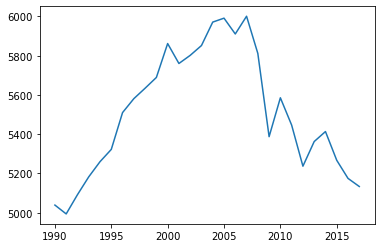

In [23]:
#Plot the CO2 levels aggregated to the entire country
plt.plot(state_CO2_plot['Year'], state_CO2_plot['United States'].astype(float))

Let's confirm that our CO2 data aggregated from the state-level data matches the trends of our NASA country-level data.  

Because CO2 is not a regional pollutant, we expect that the trends of CO2 across the country should follow a similar trend to those observed in the single location (Hawaii, from NASA data)

In [24]:
#Since the NASA data is monthly, we will group by the year
CO2_NASA_compare_df = country_CO2_df.groupby('year').mean()
#reset the index
CO2_NASA_compare_df.reset_index(inplace = True)
#make the years match up
CO2_NASA_compare_df = CO2_NASA_compare_df[CO2_NASA_compare_df['year'].astype(int) >= 1990]
CO2_NASA_compare_df = CO2_NASA_compare_df[CO2_NASA_compare_df['year'].astype(int) <= 2011]

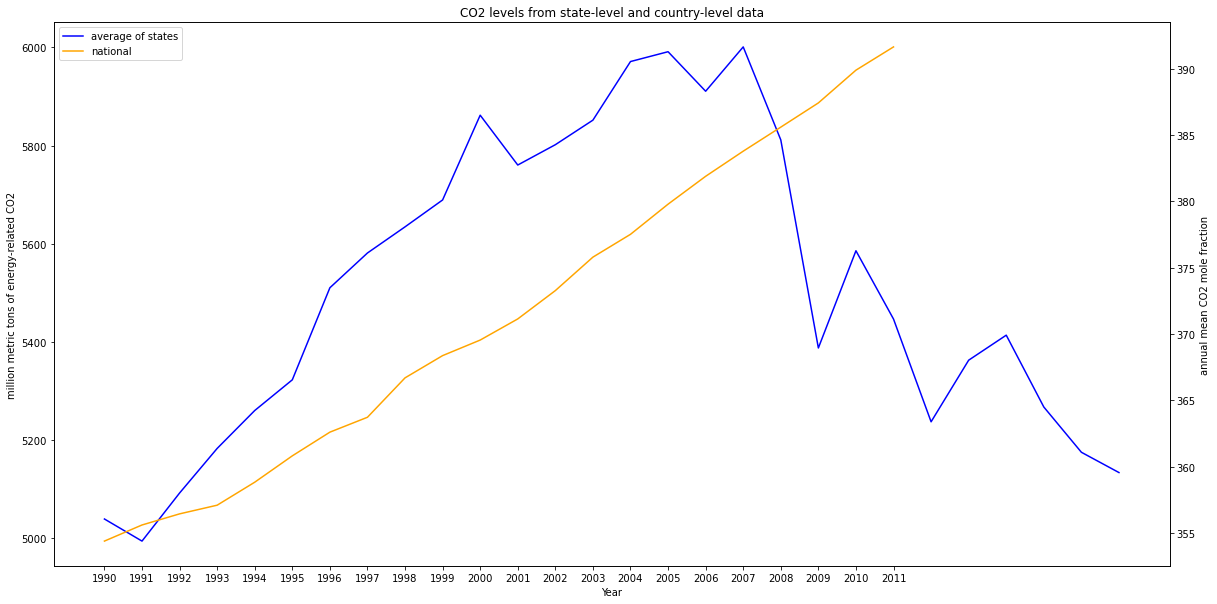

In [25]:
figure4, CO2_graph_compare = plt.subplots(figsize=(20,10))

CO2_graph_compare.plot(state_CO2_plot['Year'].astype(str), state_CO2_plot['United States'].astype(float), label = "average of states", color = "blue")
CO2_graph_compare2 = CO2_graph_compare.twinx()
CO2_graph_compare2.plot(CO2_NASA_compare_df['year'].astype(int).astype(str), CO2_NASA_compare_df['average'].astype(float), label = "national" , color = "orange")


CO2_graph_compare.set_title("CO2 levels from state-level and country-level data")
CO2_graph_compare.set_xlabel('Year')
CO2_graph_compare.set_ylabel('million metric tons of energy-related CO2')
CO2_graph_compare2.set_ylabel('annual mean CO2 mole fraction')

#Plot the legend
state_CO2_lines, state_CO2_labels = CO2_graph_compare.get_legend_handles_labels()
state_CO2_lines_2, state_CO2_labels_2 = CO2_graph_compare2.get_legend_handles_labels()

state_CO2_lines = state_CO2_lines + state_CO2_lines_2
state_CO2_labels = state_CO2_labels + state_CO2_labels_2

CO2_graph_compare.legend(state_CO2_lines, state_CO2_labels, loc= "upper left")


Next, I will read in the transportation data from before 2009

In [26]:
air_before_2019 = pd.read_csv("./data/raw_data/aircraft_data.csv")
air_before_2019.head()

,"Table 1-37: U.S. Air Carrier Aircraft Departures, Enplaned Revenue Passengers, and Enplaned Revenue Tons",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,1975,1980,1985,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,AIRCRAFT DEPARTURES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total performeda,"4,555,516","5,156,848","5,505,659","6,641,681","6,711,203","6,897,999","7,136,094","7,524,909","8,036,722",...,"8,450,987","8,440,485","8,328,338","8,273,972","8,096,255","8,075,113","8,210,517","8,263,525","8,431,304","8,637,158"
3,Total scheduled,"4,530,535","5,204,564","5,591,596","6,758,571","6,606,020","6,798,947","6,996,178","7,364,626","7,925,838",...,"8,515,359","8,473,404","8,271,104","8,262,781","8,144,034","8,095,087","8,199,224","8,279,271","8,399,298","8,597,750"
4,Large hubs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean the data

In [27]:
#remove the null first row
air_header = air_before_2019.iloc[0] #grab the first row for the header
air_before_2019 = air_before_2019[1:] #take the data less the header row
air_before_2019.columns = air_header #set the header row as the df header

In [28]:
#flip the data so the years are each a row instead of columns
air_data_flip = air_before_2019.transpose()
air_flip_header = air_data_flip.iloc[0] #grab the first row for the header
air_data_flip = air_data_flip[1:] #take the data less the header row
air_data_flip.columns = air_flip_header #set the header row as the df header


In [29]:
air_data_flip

nan,AIRCRAFT DEPARTURES,Total performeda,Total scheduled,Large hubs,Performed,Scheduled,Medium hubs,Performed,Scheduled,Small hubs,...,SOURCES,Hub Classifications:,"U.S. Department of Transportation, Federal Aviation Administration, Airport Categories, available at https://www.faa.gov/airports/planning_capacity/passenger_allcargo_stats/categories/ as of May 20, 2020.",Airport Data:,"1975-90: U.S. Department of Transportation, Bureau of Transportation Statistics, Office of Airline Information, Airport Activity Statistics of Certified Route Air Carriers (Washington, DC: Annual issues), tables 2, 3, 4, and 5.","1991-2019: U.S. Department of Transportation, Bureau of Transportation Statistics, Office of Airline Information, Airport Activity Statistics Database (Form 41 Schedule T-3), special tabulation, available at https://www.transtats.bts.gov/, as of May 20, 2020.",NaN,NaN,NaN,NaN
0,,,,,,,,,,,,,,,,,,,,,
1975,NaN,"4,555,516","4,530,535",NaN,"2,437,958","2,409,874",NaN,"902,652","899,543",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,"5,156,848","5,204,564",NaN,"2,887,239","2,905,923",NaN,"1,048,726","1,058,438",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,"5,505,659","5,591,596",NaN,"3,439,446","3,487,660",NaN,"1,185,008","1,201,540",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,"6,641,681","6,758,571",NaN,"4,167,868","4,237,466",NaN,"1,394,833","1,417,762",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,"6,711,203","6,606,020",NaN,"3,770,382","3,752,807",NaN,"1,662,337","1,639,746",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,"6,897,999","6,798,947",NaN,"3,840,689","3,836,074",NaN,"1,690,788","1,658,960",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,"7,136,094","6,996,178",NaN,"4,025,158","3,997,694",NaN,"1,712,222","1,665,336",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,"7,524,909","7,364,626",NaN,"4,357,314","4,324,739",NaN,"1,852,968","1,775,896",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,"8,036,722","7,925,838",NaN,"4,665,239","4,660,012",NaN,"1,917,979","1,864,967",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#remove the commas from our numeric column
air_data_flip['Total performeda'] = [str(air_data_flip.iloc[row, 1]).replace(',', '') for row in range(len(air_data_flip))]

air_data_flip.reset_index(inplace = True)


In [31]:
vehicle_miles = pd.read_csv("./data/vmt_clean.csv")
#drop the rows that dont have a year 
vehicle_miles = vehicle_miles.dropna(subset = ['Year'])
#take the decimal off the year column
vehicle_miles['Year'] = vehicle_miles['Year'].astype(int)
vehicle_miles.head()

,Year,Mileage,Lane Miles,VMT,VMT,Unnamed: 5
0,1900,"2,320,000",NaN,100,"100,000,000",NaN
1,1901,"2,325,000",NaN,170,"170,000,000",NaN
2,1902,"2,330,000",NaN,310,"310,000,000",NaN
3,1903,"2,340,000",NaN,460,"460,000,000",NaN
4,1904,"2,351,000",NaN,750,"750,000,000",NaN


In [32]:
#we will only look at data since 1990
vehicle_miles = vehicle_miles[vehicle_miles['Year'] >= 1990]
#remove the commas from our numeric column
vehicle_miles['VMT'] = [str(vehicle_miles.iloc[row, 4]).replace(',', '') for row in range(len(vehicle_miles))]

Now let's see if the correlation between CO2 and transportation is statistically significant. We will use a Pearson correlation statistic, which requires that   
 
1) Each variable is continuous - Check   
2) Related Pairs  - Yes, each year has both a transportation value and a CO2 point  
3) Absense of Outliers - We will have to look further into this one  
4) Linearity. The two variables should form a linear pattern (we need to check this independent of time still)


In [33]:
corr_CO2_nation = recent_CO2_us[~recent_CO2_us['Month-Year'].isin(['1-2020', '2-2020', '3-2020', '4-2020','5-2020','6-2020', '7-2020', '8-2020'])]
corr_air_travel = air_transport_recent[~air_transport_recent['Month-Year'].isin(['1-2020', '2-2020', '3-2020', '4-2020','5-2020','6-2020','7-2020', '8-2020','9-2020'])]

Let's start by checking the third requirement - these histograms look like there MIGHT be outliers, so we will have to calculate to check - we will use  > 3 standard deviations to classify an "outlier". We will use scipy's stats function to do this



Text(0.5, 1.0, 'Distribution of Monthly CO2 Observations 2017 - 2020')

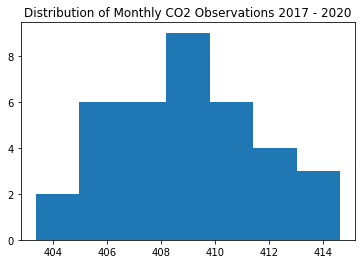

In [34]:
plt.hist(x=corr_CO2_nation['average'], bins='auto')
plt.title("Distribution of Monthly CO2 Observations 2017 - 2019")

Text(0.5, 1.0, 'Distribution of Monthly Airline Passengers 2017 - 2020')

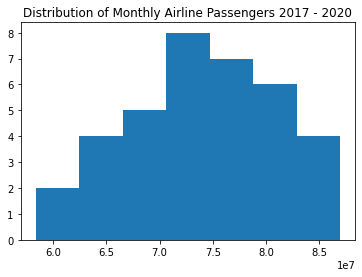

In [35]:
plt.hist(x = corr_air_travel['airline_total'], bins = 'auto')
plt.title("Distribution of Monthly Airline Passengers 2017 - 2019")

In [36]:
if (abs(stats.zscore(corr_CO2_nation['average'])) > 3).any() or (abs(stats.zscore(corr_air_travel['airline_total'])) > 3).any():
    print('There are outliers in one or both datasets')
else:
    print('There are no outliers')

#none of the z scores of the CO2 data or transportation data have an absolute value greater than 3, so this dataset doesn't have any outliers

There are no outliers


No outliers, so point #3 is satisfied. Now let's confirm point # 4, that the data has a linear relationship.  


From this scatter plot, it looks like if anything, the pattern is linear

Text(0.5, 1.0, 'Airline Traffic and CO2 Emissions 2017 - 2020')

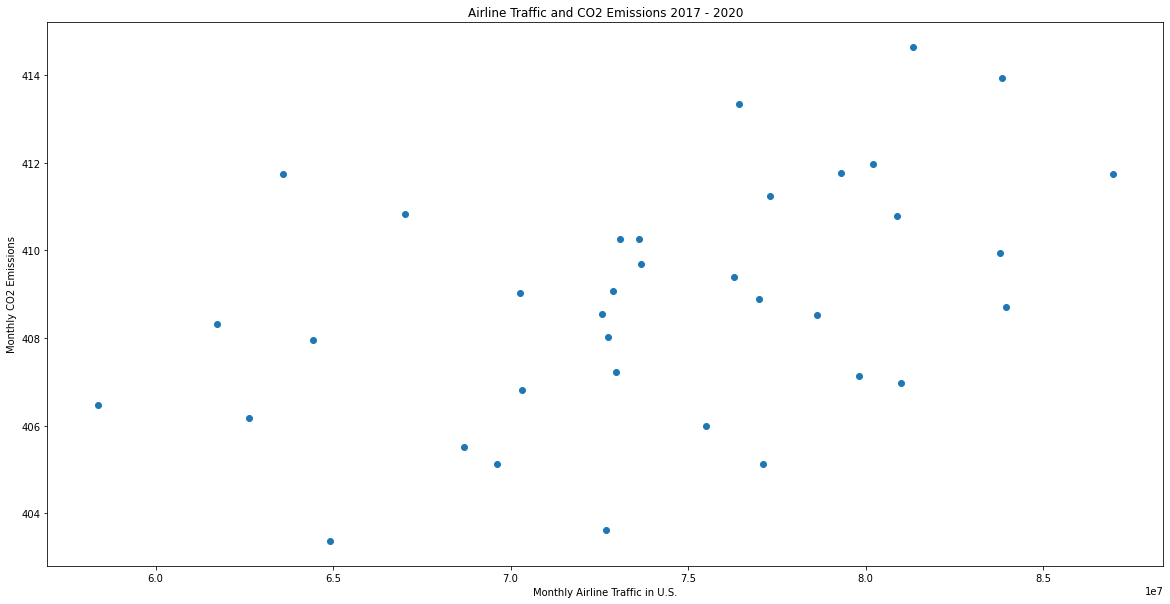

In [37]:
plt.figure(figsize=(20,10))
plt.scatter(corr_air_travel['airline_total'], corr_CO2_nation['average'])
plt.xlabel("Monthly Airline Traffic in U.S.")
plt.ylabel("Monthly CO2 Emissions")
plt.title("Airline Traffic and CO2 Emissions 2017 - 2019")

Now let's calculate the correlation coefficient using the scipy pearsonr function

In [38]:
transportation_corr = stats.pearsonr(corr_air_travel['airline_total'], corr_CO2_nation['average'])
print(transportation_corr)

(0.44963743603528894, 0.005936664951640469)


Because the correlation coefficient is 0.45, we see that the correlation between these two variables is weak, but the p-value is 0.0059, which indicates that the correlation is in fact significant. This indicates that perhaps there are other factors significantly impacting CO2 levels besides air transport, but that monthly air transport certainly does correlate with monthly CO2 levels between 2017 and 2020.

  
  
Let's see if the correlation holds true post-COVID as well
   


In [39]:
post_covid_CO2 = country_CO2_df[(country_CO2_df['year'].astype(int) >= 2020) & (country_CO2_df['month'].astype(int) >= 3) & (country_CO2_df['month'].astype(int) <= 6)]
post_covid_air_traffic= air_transport_recent[(air_transport_recent['Year'] == 2020) & (air_transport_recent['Month'] >= 3) & (air_transport_recent['Month'] <= 6)]

Text(0.5, 1.0, 'Distribution of Monthly CO2 Observations Post-COVID')

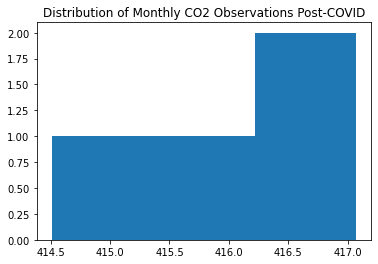

In [40]:
plt.hist(x=post_covid_CO2['average'], bins='auto')
plt.title("Distribution of Monthly CO2 Observations Post-COVID")

(array([2., 1., 1.]),
 array([ 3010000.        , 15026666.66666667, 27043333.33333333,
        39060000.        ]),
 <a list of 3 Patch objects>)

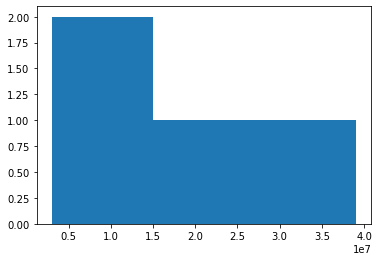

In [41]:
plt.hist(x = post_covid_air_traffic['airline_total'], bins = 'auto')

Text(0.5, 1.0, 'Airline Traffic and CO2 Emissions March 2020 - June 2020')

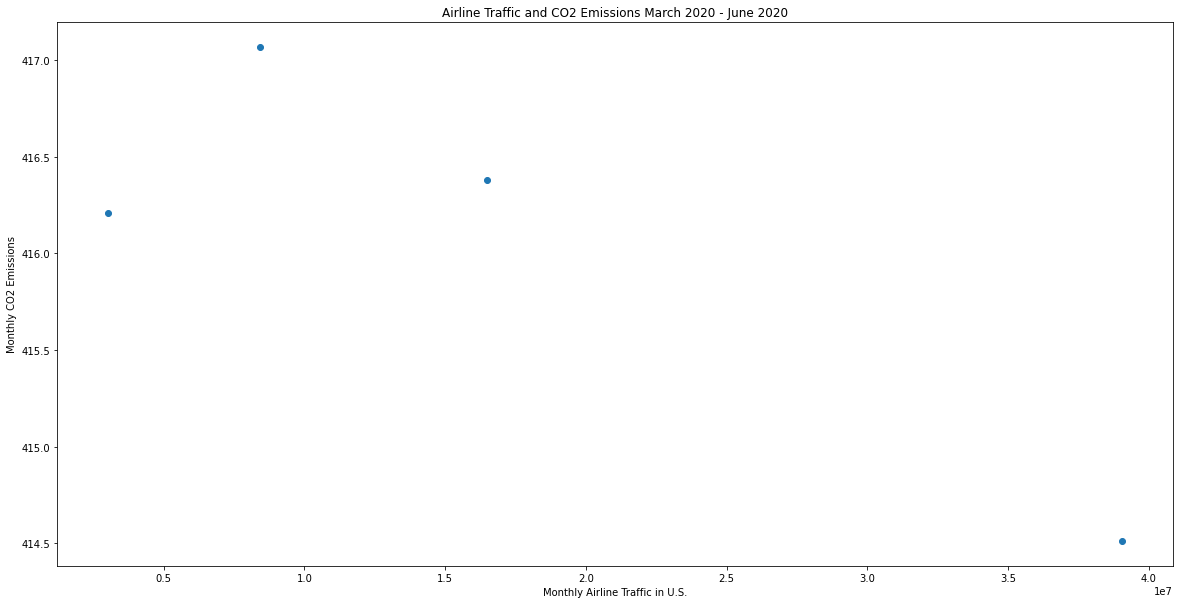

In [42]:
plt.figure(figsize = (20,10))
plt.scatter(post_covid_air_traffic['airline_total'], post_covid_CO2['average'])
plt.xlabel("Monthly Airline Traffic in U.S.")
plt.ylabel("Monthly CO2 Emissions")
plt.title("Airline Traffic and CO2 Emissions March 2020 - June 2020")

In [43]:
post_covid_corr = stats.spearmanr(post_covid_air_traffic['airline_total'], post_covid_CO2['average'])
print(post_covid_corr)

SpearmanrResult(correlation=-0.39999999999999997, pvalue=0.6)


We see here that the correlation between monthly air traffic and CO2 post-COVID is not significant 

Now, let's try the same test on the air travel data before 2019

In [44]:
#Clean the data
corr_air_2019 = air_data_flip.loc[:, [0, 'Total performeda'] ]
corr_air_2019 = corr_air_2019.rename(columns = {0 : 'Year', 'Total performeda' : 'performed_flights'})

#we are only going to use the data where the flights were recorded every year - the earlier rows were every 5
corr_air_2019 = corr_air_2019[corr_air_2019['Year'].astype(int) >= 1990]

In [45]:
corr_air_2019

nan,Year,performed_flights
3,1990,6641681
4,1991,6711203
5,1992,6897999
6,1993,7136094
7,1994,7524909
8,1995,8036722
9,1996,8205411
10,1997,8112516
11,1998,8308153
12,1999,8602689


In [46]:
corr_CO2_2019 = country_CO2_df.groupby(by = 'year').mean().reset_index()
corr_CO2_2019 = corr_CO2_2019.loc[:, ['year', 'average']]
corr_CO2_2019 = corr_CO2_2019[corr_CO2_2019['year'].isin(corr_air_2019['Year'])]

Text(0.5, 1.0, 'Distribution of Annual Performed Flights 1990 - 2008')

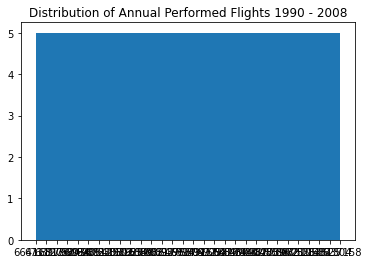

In [47]:
plt.hist(x = corr_air_2019['performed_flights'], bins = 'auto')
plt.title("Distribution of Annual Performed Flights 1990 - 2008")

Text(0.5, 1.0, 'Distribution of Annual CO2 Observations 1990 - 2008')

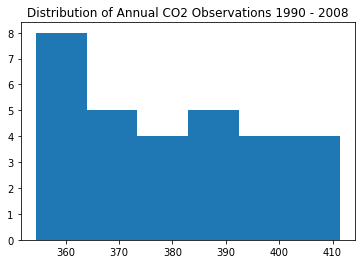

In [48]:
plt.hist(x =corr_CO2_2019['average'], bins = 'auto' )
plt.title("Distribution of Annual CO2 Observations 1990 - 2008")

Hmm... while there aren't any outliers in this data, it seems that it has a uniform distribution, not a normal distribution. Because of this, we will use the Spearman's Correlation Coefficient.  

  
  
 Let's first visualize it to get a feel for what we expect to see


Text(0, 0.5, 'Annual Mean CO2')

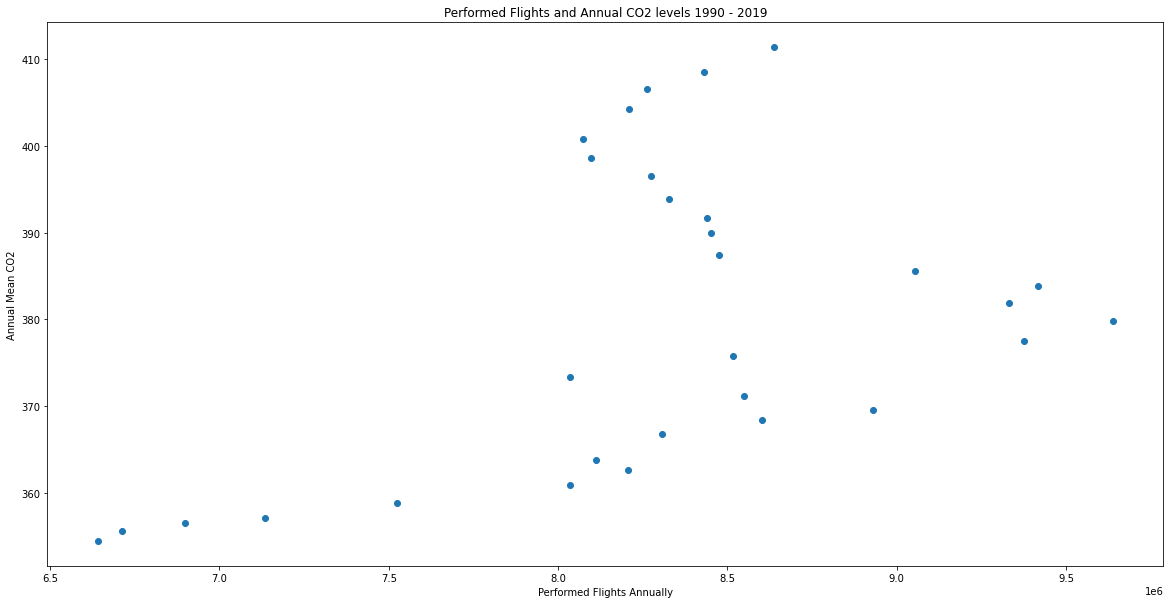

In [49]:
plt.figure(figsize=(20,10))
plt.scatter(corr_air_2019['performed_flights'].astype(float) ,corr_CO2_2019['average'])
plt.title("Performed Flights and Annual CO2 levels 1990 - 2019")
plt.xlabel("Performed Flights Annually")
plt.ylabel("Annual Mean CO2")

That looks like it might have a positive linear correlation. Let's see what the correlation coefficient gives us

In [50]:
transportation_2019_corr = stats.spearmanr(corr_air_2019['performed_flights'].astype(float), corr_CO2_2019['average'].astype(float))
print(transportation_2019_corr)

SpearmanrResult(correlation=0.41401557285873186, pvalue=0.022939131729780765)


Yes, these seem to be have a significant correlation. There is a weak positive correlation between yearly performed flights and the average annual CO2 levels between 1990 and 2019. The correlation coefficient is 0.414 with a p value of 0.023, which is significant

Next Let's check the annual vehicle mileage data

In [51]:
corr_vmt = vehicle_miles.loc[:, ['Year', 'VMT']]

corr_CO2_2009 = country_CO2_df.groupby(by = 'year').mean().reset_index()
corr_CO2_2009 = corr_CO2_2009.loc[:, ['year', 'average']]
corr_CO2_2009 = corr_CO2_2009[corr_CO2_2009['year'].astype(int).isin(corr_vmt['Year'])]

Text(0.5, 1.0, 'Distribution of Annual Vehicle Miles Traveled 1990 - 2009')

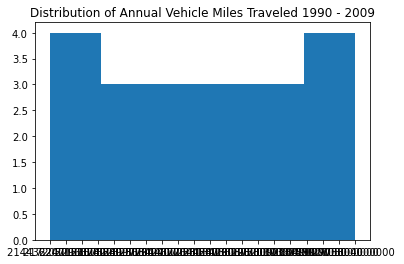

In [52]:
plt.hist(x = corr_vmt['VMT'], bins = 'auto')
plt.title("Distribution of Annual Vehicle Miles Traveled 1990 - 2009")

Text(0.5, 1.0, 'Distribution of Annual CO2 Emissions 1990 - 2009')

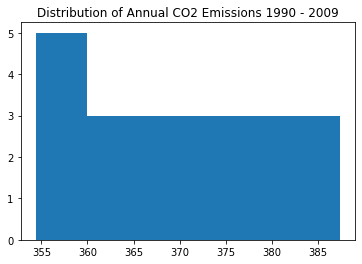

In [53]:
plt.hist(x = corr_CO2_2009['average'], bins = 'auto')
plt.title("Distribution of Annual CO2 Emissions 1990 - 2009")

Again, since this is not normally distributed data, we will use the spearman's correlation coefficient

In [74]:
annual_CO2_df = country_CO2_df.groupby('year').sum()
annual_CO2_df.reset_index(inplace = True)
annual_CO2_df = annual_CO2_df[(vmt_CO2_df['year'].astype(int) >= 1990) &(annual_CO2_df['year'].astype(int) <= 2009)]
annual_CO2_df

,year,month,average,interpolated,trend
32,1990,78,4252.72,4252.72,4252.72
33,1991,78,4267.29,4267.29,4267.28
34,1992,78,4277.35,4277.35,4277.37
35,1993,78,4285.20,4285.20,4285.20
36,1994,78,4306.00,4306.00,4305.99
37,1995,78,4329.84,4329.84,4329.84
38,1996,78,4351.28,4351.28,4351.28
39,1997,78,4364.75,4364.75,4364.76
40,1998,78,4400.40,4400.40,4400.39
41,1999,78,4420.53,4420.53,4420.54


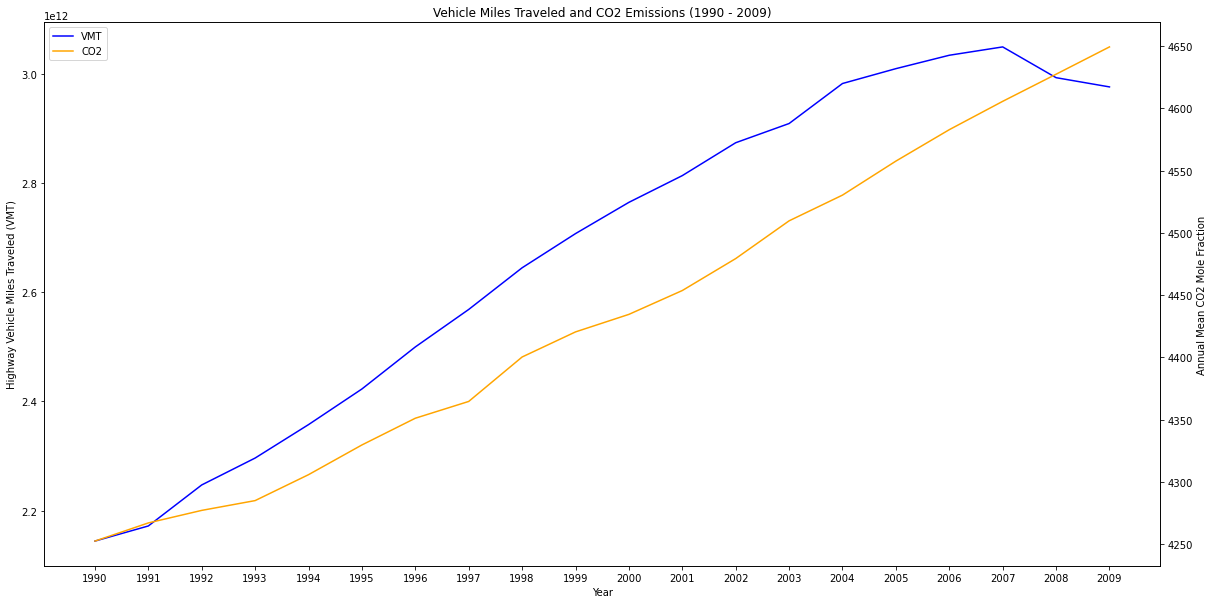

In [91]:
figure, CO2_vmt = plt.subplots(figsize=(20,10))

CO2_vmt2 = CO2_vmt.twinx()
CO2_vmt.plot(corr_vmt['Year'].astype(str), corr_vmt['VMT'].astype(float), label = "VMT", color = "blue")
CO2_vmt.set_ylabel("Highway Vehicle Miles Traveled (VMT)")
CO2_vmt.set_xlabel("Year")
CO2_vmt.set_title("Vehicle Miles Traveled and CO2 Emissions (1990 - 2009)")

CO2_vmt2.plot(annual_CO2_df['year'].astype(str), annual_CO2_df['average'], color = 'orange', label = 'CO2')
CO2_vmt2.set_ylabel("Annual Mean CO2 Mole Fraction")



#Plot the legend 
CO2_vmt_lines, CO2_vmt_labels = CO2_vmt.get_legend_handles_labels()
CO2_vmt2_lines, CO2_vmt2_labels = CO2_vmt2.get_legend_handles_labels()

vmt_lines = CO2_vmt_lines + CO2_vmt2_lines
vmt_labels = CO2_vmt_labels + CO2_vmt2_labels

CO2_vmt.legend(vmt_lines, vmt_labels, loc= "upper left")

Text(0, 0.5, 'Annual Mean CO2 Levels')

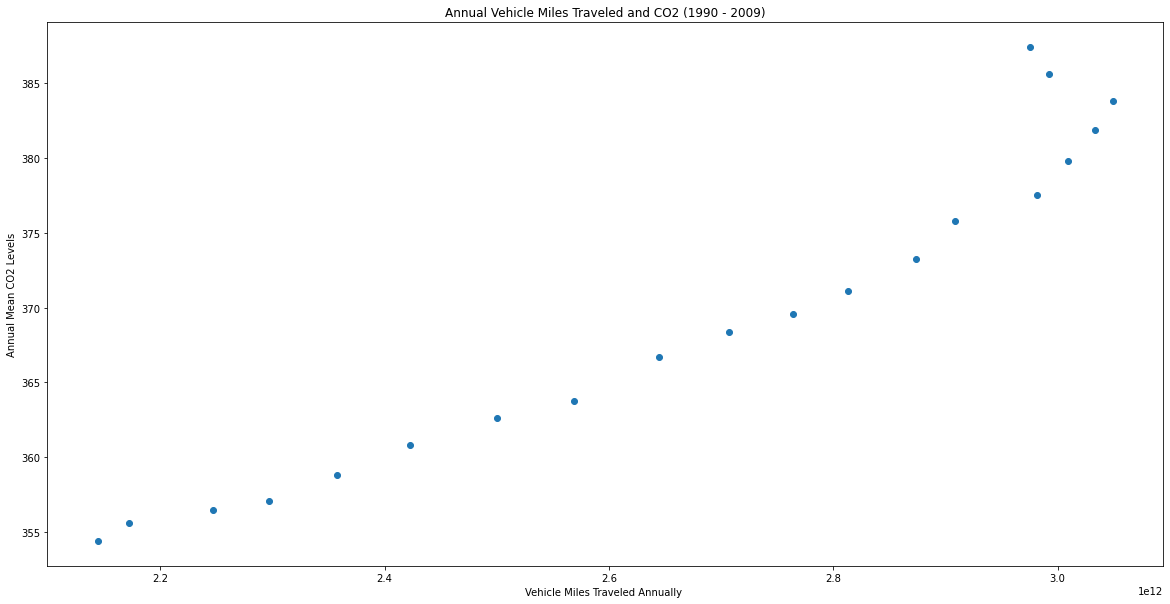

In [98]:
plt.figure(figsize=(20,10))
plt.scatter(corr_vmt['VMT'].astype(float), corr_CO2_2009['average'])
plt.title("Annual Vehicle Miles Traveled and CO2 (1990 - 2009)")
plt.xlabel("Vehicle Miles Traveled Annually ")
plt.ylabel("Annual Mean CO2 Levels")

In [68]:
vehicle_miles_corr = stats.spearmanr(corr_vmt['VMT'].astype(float), corr_CO2_2009['average'].astype(float))
print(vehicle_miles_corr)

SpearmanrResult(correlation=0.9684210526315788, pvalue=2.6449829899729473e-12)


There is a 0.9684 correlation coefficient between the annual vehicle miles traveled and the mean annual CO2 values between 1990 and 2009. This indicates a positive correlation, and since the p value is 0.000000000002645, we know that this correlation is significant

In [94]:
highway_monthly_df = transportation_df.loc[:, ['Highway Vehicle Miles Traveled - All Systems', 'Month', 'Year']]
highway_monthly_df.rename(columns = {'Highway Vehicle Miles Traveled - All Systems' : 'highway_miles'}, inplace = True)
highway_monthly_df = highway_monthly_df[~highway_monthly_df['highway_miles'].isna()]
highway_monthly_df['highway_miles'] = [float(str(val).replace(',', '')) for val in highway_monthly_df['highway_miles']]
highway_monthly_df['Month-Year'] = highway_monthly_df.loc[: , 'Month'].astype(str) + '-' + highway_monthly_df.loc[:, 'Year'].astype(str)
highway_monthly_df = highway_monthly_df[highway_monthly_df['Year'] < 2020]

In [95]:
CO2_2018 = country_CO2_df[country_CO2_df['year'].astype(int).isin(highway_monthly_df['Year'])]

In [101]:
CO2_2018

,year,month,decimaldate,average,interpolated,trend,days,Month-Year
718,2018,1,"2,018,042",407.96,407.96,407.66,29,1-2018
719,2018,2,"2,018,125",408.32,408.32,407.47,28,2-2018
720,2018,3,"2,018,208",409.39,409.39,407.92,29,3-2018
721,2018,4,"2,018,292",410.25,410.25,407.46,21,4-2018
722,2018,5,"2,018,375",411.24,411.24,407.75,24,5-2018
723,2018,6,"2,018,458",410.79,410.79,408.40,29,6-2018
724,2018,7,"2,018,542",408.70,408.70,408.36,27,7-2018
725,2018,8,"2,018,625",406.97,406.97,408.89,31,8-2018
726,2018,9,"2,018,708",405.52,405.52,409.12,29,9-2018
727,2018,10,"2,018,792",406.00,406.00,409.43,30,10-2018


Text(0.5, 1.0, 'Distribution of Monthly Vehicle Miles Traveled 2018 - 2019')

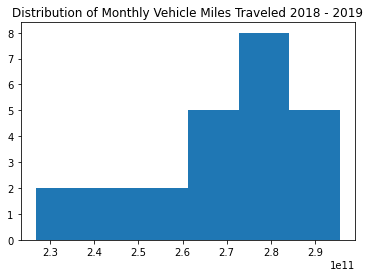

In [71]:
plt.hist(x = highway_monthly_df['highway_miles'], bins = 'auto')
plt.title("Distribution of Monthly Vehicle Miles Traveled 2018 - 2019")

Text(0.5, 1.0, 'Distribution of Monthly CO2 levels 2018 - 2019')

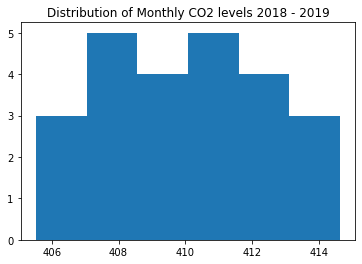

In [72]:
plt.hist(x = CO2_2018['average'], bins = 'auto')
plt.title("Distribution of Monthly CO2 levels 2018 - 2019")

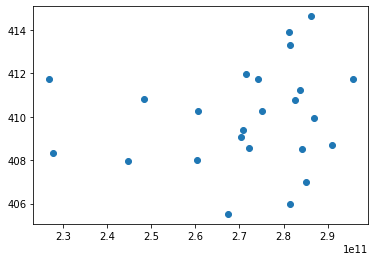

In [73]:
plt.scatter(highway_monthly_df['highway_miles'], CO2_2018['average'].astype(float))

Since this data is normally distributed and appears to have a linear relationship, we can use the pearson correlation coefficient

In [74]:
highway_monthly_corr = stats.pearsonr(highway_monthly_df['highway_miles'], CO2_2018['average'].astype(float))
print(highway_monthly_corr)

(0.1549041534679378, 0.469838883918301)


We see here that monthly vehicle miles traveled and CO2 levels do not have a statistically significant correlation from 2018 - 2019

All in all, we see the following statistically significant Correlations:

Air Traffic:
* There is a statistically significant, weak, positive correlation between monthly air traffic and CO2 levels 2017-2019
* There is a statistically significant, weak, positive correlation between annual performed flights and mean annual CO2 levels 1990 - 2019

Vehicle Highway Miles Traveled:

* There is a highly statistically significant, strong, positive correlation between annual vehicle miles traveled and mean annual CO2 levels 1990 - 2009